<a href="https://colab.research.google.com/github/rohit0906/Projects/blob/master/pilot_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/drive/15DyxsvgHvsfzsT4D4LpKKuHKY5ikjaQx?usp=sharing"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Goal

1.   Comparing **mxnet-gluon** backend on **resnet18_v1, resnet18_v2** and **resnet34_v1** architecture using the given dataset.
2.   Steps

      - Installing Monk.
      - Loading the dataset.
      - Importing **mxnet-gluon**.
      - Training model using **resnet18_v1** architecture.
      - Training model using **resnet18_v2** architecture.
      - Training model using **resnet34_v1** architecture.
      - Comparing the above models using the **comparison** class of Monk for training accuracy, validation accuracy, training loss, validation loss, time taken in training and GPU usage.
---









# Table of contents

## [0. Install Monk](#0)

## [1. Loading the Dataset](#1)

## [2. Importing mxnet-gluon backend](#2)

## [3. Gluon resnet18_v1](#3)

## [4. Gluon resnet18_v2](#4)

## [5. Gluon resnet34_v1](#5)

## [6. Comparing all the models.](#6)

---


# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation/Misc && pip install -r requirements_colab.txt

In [ ]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

Cloning into 'monk_v1'...
remote: Enumerating objects: 140, done.
remote: Counting objects: 100% (140/140), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 4680 (delta 91), reused 74 (delta 41), pack-reused 4540
Receiving objects: 100% (4680/4680), 114.51 MiB | 34.82 MiB/s, done.
Resolving deltas: 100% (2987/2987), done.


In [ ]:
# If using Colab install using the commands below
!cd monk_v1/installation/Misc && pip install -r requirements_colab.txt

     |████████████████████████████████| 710.5MB 24kB/s 
     |████████████████████████████████| 757kB 55.2MB/s 
  Created wheel for GPUtil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7413 sha256=04d3c43ddad02487a437008f473a0518fc473cad004ff272cc9d296ff552820b
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built GPUtil
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");



---



<a id='1'></a>
# Loading the Dataset

- Credits: https://drive.google.com/file/d/0BxDIywue_VABY1dRcFVvZ3BodnM/view?usp=sharing

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=0BxDIywue_VABY1dRcFVvZ3BodnM' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=0BxDIywue_VABY1dRcFVvZ3BodnM" -O dataset.zip && rm -rf /tmp/cookies.txt

--2020-07-18 11:30:25--  https://docs.google.com/uc?export=download&id=0BxDIywue_VABY1dRcFVvZ3BodnM
Resolving docs.google.com (docs.google.com)... 172.217.214.101, 172.217.214.100, 172.217.214.138, ...
Connecting to docs.google.com (docs.google.com)|172.217.214.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   3.15K  --.-KB/s    in 0s      

2020-07-18 11:30:25 (62.4 MB/s) - written to stdout [3230]

--2020-07-18 11:30:25--  https://docs.google.com/uc?export=download&confirm=dZ8Q&id=0BxDIywue_VABY1dRcFVvZ3BodnM
Resolving docs.google.com (docs.google.com)... 108.177.111.138, 108.177.111.113, 108.177.111.101, ...
Connecting to docs.google.com (docs.google.com)|108.177.111.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-3c-docs.googleusercontent.com/docs/securesc/jkd3feq729gm0ggckfrs4rdfnkq1uj7g/813d6421gvla

In [ ]:
! unzip -qq dataset.zip

Classes in the datatset

In [93]:
os.listdir('Train')

['Exterior',
 'bedroom',
 'kitchen',
 'living_room',
 'Interior',
 'bathroom',
 'dining_room']

The dataset contains 7 class namely, 'Exterior', 'bedroom', 'kitchen', 'living_room', 'Interior', 'bathroom', 'dining_room'.

In [103]:
print("Images in Exterior folder {}".format(len(os.listdir('Train/Exterior'))))
print("Images in bedroom folder {}".format(len(os.listdir('Train/bedroom'))))
print("Images in kitchen folder {}".format(len(os.listdir('Train/kitchen'))))
print("Images in living_room folder {}".format(len(os.listdir('Train/living_room'))))
print("Images in Interior folder {}".format(len(os.listdir('Train/Interior'))))
print("Images in bathroom folder {}".format(len(os.listdir('Train/bathroom'))))
print("Images in dining_room folder {}".format(len(os.listdir('Train/dining_room'))))

Images in Exterior folder 24869
Images in bedroom folder 24123
Images in kitchen folder 24234
Images in living_room folder 24210
Images in Interior folder 19000
Images in bathroom folder 9501
Images in dining_room folder 19500


Visualising the dataset using IPython library

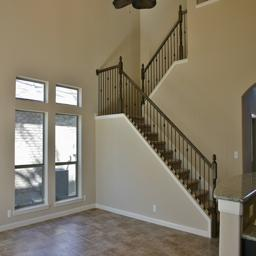

In [83]:
#Interior
img_name = 'Train/Interior/00004977.jpg'
from IPython.display import Image
Image(filename=img_name)

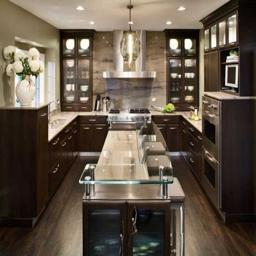

In [84]:
#Kitchen
img_name = 'Train/kitchen/00004977.jpg'
from IPython.display import Image
Image(filename=img_name)

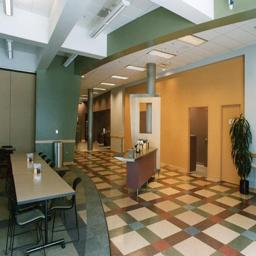

In [90]:
#Dining room
img_name = 'Train/dining_room/00004977.jpg'
from IPython.display import Image
Image(filename=img_name)

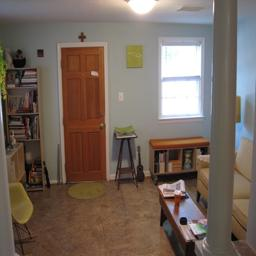

In [91]:
#Living room
img_name = 'Train/living_room/00004977.jpg'
from IPython.display import Image
Image(filename=img_name)

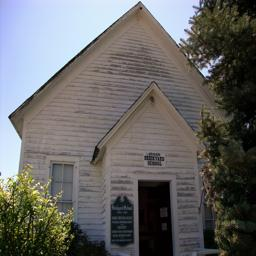

In [92]:
#Exterior
img_name = 'Train/Exterior/00004977.jpg'
from IPython.display import Image
Image(filename=img_name)

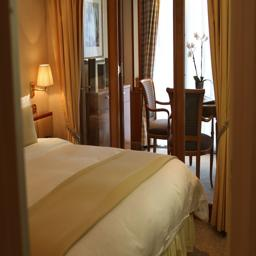

In [88]:
#Bedroom
img_name = 'Train/bedroom/00004977.jpg'
from IPython.display import Image
Image(filename=img_name)

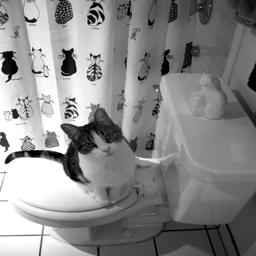

In [105]:
#Bathroom
img_name = 'Train/bathroom/00004981.jpg'
from IPython.display import Image
Image(filename=img_name)

Now, lets move on to import mxnet-gluon backend



---



<a id='2'></a>
# Importing mxnet-gluon backend

In [ ]:
#Using mxnet-gluon backend 
from gluon_prototype import prototype

As the mxnet-gluon has been loaded lets now load the architectures and train our models.

<a id='3'></a>
#Gluon resnet18_v1

##Creating and managing experiments

    - Provide project name(Task)
    - Provide experiment name(gluon_resnet18_v1)

In [ ]:
monk_gln = prototype(verbose=1);
monk_gln.Prototype("Task", "gluon_resnet18_v1");

Mxnet Version: 1.6.0

Experiment Details
    Project: Task
    Experiment: gloun_resnet18_v1
    Dir: /content/workspace/Task/gloun_resnet18_v1/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------------Task
                        |
                        |
                        |-----gluon_resnet18_v1
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)



In [ ]:
monk_gln.Default(dataset_path="Train", 
            model_name="resnet18_v1", 
            freeze_base_network=True,
            num_epochs=2);

Dataset Details
    Train path:     Train
    Val path:       None
    CSV train path: None
    CSV val path:   None
    Label Type:     single

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   2
    Train-val split:   0.7



/usr/local/lib/python3.6/dist-packages/mxnet/gluon/data/vision/datasets.py:318: UserWarning: Ignoring Train/bathroom/bath_copy of type . Only support .jpg, .jpeg, .png
  filename, ext, ', '.join(self._exts)))


Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 101805
    Num val images:   43631
    Num classes:      7

Model Params
    Model name:           resnet18_v1
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model


42435KB [00:00, 42722.18KB/s]                           


    Model Loaded on device
        Model name:                           resnet18_v1
        Num of potentially trainable layers:  41
        Num of actual trainable layers:       1

Optimizer
    Name:          sgd
    Learning rate: 0.01
    Params:        {'lr': 0.01, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}



Learning rate scheduler
    Name:   steplr
    Params: {'step_size': 1, 'gamma': 0.98, 'last_epoch': -1}

Loss
    Name:          softmaxcrossentropy
    Params:        {'weight': None, 'batch_axis': 0, 'axis_to_sum_over': -1, 'label_as_categories': True, 'label_smoothing': False}

Training params
    Num Epochs: 2

Display params
    Display progress:          True
    Display progress realtime: True
    Save Training logs:        True
    Save Intermediate models:  True
    Intermediate model prefix: intermediate_model_



monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


As the data set is very large we will be training each model for only 2 epochs. To get an idea about the training time we will use `Estimate_Train_Time()` function of Monk library.

In [ ]:
monk_gln.Estimate_Train_Time(num_epochs=2)

Training time estimate
    3 Epochs: Approx. 32 Min



In [ ]:
#Start Training
monk_gln.Train();

Removing the training output to save the space. As we will be comparing the models graphically towards the end of the notebook removing training ouput will not have any problem.

##Lets start predicting the classes of some of the given images.

Loading model to test the images. 
`
eval_infer=True
`
This parameter loads model in inference mode to predict the class of image.


In [52]:
monk_eval=prototype(verbose=1)
monk_eval.Prototype("Task", "gloun_resnet18_v1", eval_infer=True);

Mxnet Version: 1.6.0

Model Details
    Loading model - workspace/Task/gloun_resnet18_v1/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Task
    Experiment: gloun_resnet18_v1
    Dir: /content/workspace/Task/gloun_resnet18_v1/



Prediction
    Image name:         Train/bedroom/00004988.jpg
    Predicted class:      bedroom
    Predicted score:      10.312103271484375



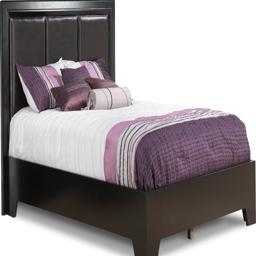

In [53]:
img_name = 'Train/bedroom/00004988.jpg'
pred = monk_eval.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name)

Prediction
    Image name:         Train/Exterior/00004988.jpg
    Predicted class:      Exterior
    Predicted score:      8.040682792663574



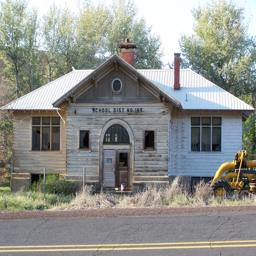

In [55]:
img_name = 'Train/Exterior/00004988.jpg'
pred = monk_eval.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name)

Prediction
    Image name:         Train/living_room/00004988.jpg
    Predicted class:      bedroom
    Predicted score:      3.6793408393859863



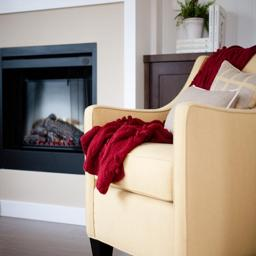

In [59]:
img_name = 'Train/living_room/00004988.jpg'
pred = monk_eval.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name)

Prediction
    Image name:         Train/dining_room/00004988.jpg
    Predicted class:      dining_room
    Predicted score:      8.199894905090332



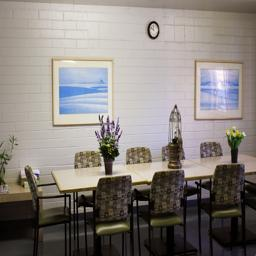

In [58]:
img_name = 'Train/dining_room/00004988.jpg'
pred = monk_eval.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name)



---



<a id='4'></a>
#Gluon resnet18_v2

##Creating and managing experiments

    - Provide project name(Task)
    - Provide experiment name(gluon_resnet18_v2)

In [ ]:
monk_gln = prototype(verbose=1);
monk_gln.Prototype("Task", "gluon-resnet18_v2");

Mxnet Version: 1.6.0

Experiment Details
    Project: Task
    Experiment: gloun-resnet18_v2
    Dir: /content/workspace/Task/gloun-resnet18_v2/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------------Task
                        |
                        |
                        |-----gluon_resnet18_v2
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)


In [ ]:
monk_gln.Default(dataset_path="Train", 
            model_name="resnet18_v2", 
            freeze_base_network=True,
            num_epochs=2);

Dataset Details
    Train path:     Train
    Val path:       None
    CSV train path: None
    CSV val path:   None
    Label Type:     single

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   2
    Train-val split:   0.7



/usr/local/lib/python3.6/dist-packages/mxnet/gluon/data/vision/datasets.py:318: UserWarning: Ignoring Train/bathroom/bath_copy of type . Only support .jpg, .jpeg, .png
  filename, ext, ', '.join(self._exts)))


Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 101805
    Num val images:   43631
    Num classes:      7

Model Params
    Model name:           resnet18_v2
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model






  0%|          | 0/42416 [00:00<?, ?KB/s]



  1%|          | 238/42416 [00:00<00:20, 2107.89KB/s]



  5%|▍         | 1980/42416 [00:00<00:14, 2833.29KB/s]



 22%|██▏       | 9253/42416 [00:00<00:08, 3981.08KB/s]



 34%|███▎      | 14274/42416 [00:00<00:05, 5318.81KB/s]



 53%|█████▎    | 22483/42416 [00:00<00:02, 7391.41KB/s]



 63%|██████▎   | 26684/42416 [00:00<00:01, 9795.08KB/s]



 80%|███████▉  | 33724/42416 [00:00<00:00, 12570.27KB/s]



100%|██████████| 42416/42416 [00:01<00:00, 40272.48KB/s]


    Model Loaded on device
        Model name:                           resnet18_v2
        Num of potentially trainable layers:  40
        Num of actual trainable layers:       1

Optimizer
    Name:          sgd
    Learning rate: 0.01
    Params:        {'lr': 0.01, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}



Learning rate scheduler
    Name:   steplr
    Params: {'step_size': 1, 'gamma': 0.98, 'last_epoch': -1}

Loss
    Name:          softmaxcrossentropy
    Params:        {'weight': None, 'batch_axis': 0, 'axis_to_sum_over': -1, 'label_as_categories': True, 'label_smoothing': False}

Training params
    Num Epochs: 2

Display params
    Display progress:          True
    Display progress realtime: True
    Save Training logs:        True
    Save Intermediate models:  True
    Intermediate model prefix: intermediate_model_



monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


As the data set is large we will be training each model for only 2 epochs. To get an idea about the training time we will use `Estimate_Train_Time()` function of Monk library.

In [ ]:
monk_gln.Estimate_Train_Time(num_epochs=2)

Training time estimate
    2 Epochs: Approx. 22 Min



In [ ]:
monk_gln.Train()

Removing the training output to save the space. As we will be comparing the models graphically towards the end of the notebook removing training ouput will not have any problem.

##Lets start predicting the classes of some of the given images.

Loading model to test the images. 
`
eval_infer=True
`
This parameter loads model in inference mode to predict the class of image.


In [62]:
monk_eval=prototype(verbose=1)
monk_eval.Prototype("Task", "gloun-resnet18_v2", eval_infer=True);

Mxnet Version: 1.6.0

Model Details
    Loading model - workspace/Task/gloun-resnet18_v2/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Task
    Experiment: gloun-resnet18_v2
    Dir: /content/workspace/Task/gloun-resnet18_v2/



Prediction
    Image name:         Train/bedroom/00004988.jpg
    Predicted class:      bedroom
    Predicted score:      9.600360870361328



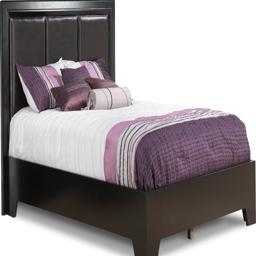

In [48]:
img_name = 'Train/bedroom/00004988.jpg'
pred = monk_eval.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name)

Prediction
    Image name:         Train/Exterior/00004988.jpg
    Predicted class:      Exterior
    Predicted score:      7.5991106033325195



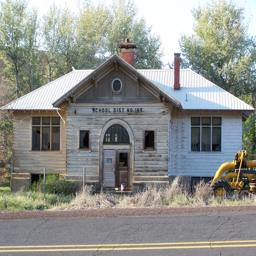

In [49]:
img_name = 'Train/Exterior/00004988.jpg'
pred = monk_eval.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name)

Prediction
    Image name:         Train/Interior/00004980.jpg
    Predicted class:      Interior
    Predicted score:      3.5074868202209473



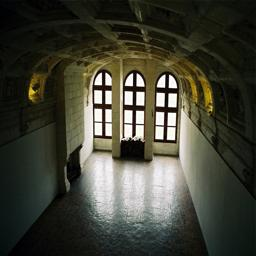

In [51]:
img_name = 'Train/Interior/00004980.jpg'
pred = monk_eval.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name)

Prediction
    Image name:         Train/living_room/00004988.jpg
    Predicted class:      bedroom
    Predicted score:      3.9957916736602783



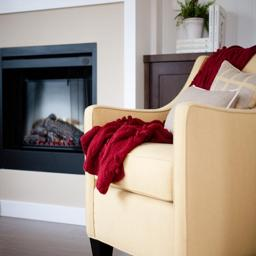

In [63]:
img_name = 'Train/living_room/00004988.jpg'
pred = monk_eval.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name)



---



<a id='5'></a>
#Gluon resnet34_v1

##Creating and managing experiments

    - Provide project name(Task)
    - Provide experiment name(gluon_resnet18_v2)

In [64]:
monk_gln = prototype(verbose=1);
monk_gln.Prototype("Task", "gluon-resnet34_v1");

Mxnet Version: 1.6.0

Experiment Details
    Project: Task
    Experiment: gloun-resnet34_v1
    Dir: /content/workspace/Task/gloun-resnet34_v1/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------------Task
                        |
                        |
                        |-----gluon_resnet34_v1
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)


In [65]:
monk_gln.Default(dataset_path="Train", 
            model_name="resnet34_v1", 
            freeze_base_network=True,
            num_epochs=2);

Dataset Details
    Train path:     Train
    Val path:       None
    CSV train path: None
    CSV val path:   None
    Label Type:     single

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   2
    Train-val split:   0.7



/usr/local/lib/python3.6/dist-packages/mxnet/gluon/data/vision/datasets.py:318: UserWarning: Ignoring Train/bathroom/bath_copy of type . Only support .jpg, .jpeg, .png
  filename, ext, ', '.join(self._exts)))


Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 101805
    Num val images:   43631
    Num classes:      7

Model Params
    Model name:           resnet34_v1
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model










  0%|          | 0/79094 [00:00<?, ?KB/s]







  0%|          | 242/79094 [00:00<00:38, 2023.58KB/s]







  3%|▎         | 2074/79094 [00:00<00:28, 2730.49KB/s]







 11%|█         | 8657/79094 [00:00<00:18, 3832.57KB/s]







 23%|██▎       | 17880/79094 [00:00<00:11, 5379.29KB/s]







 32%|███▏      | 25698/79094 [00:00<00:07, 7464.48KB/s]







 42%|████▏     | 33411/79094 [00:00<00:04, 10238.87KB/s]







 53%|█████▎    | 41888/79094 [00:00<00:02, 13906.69KB/s]







 64%|██████▎   | 50416/79094 [00:00<00:01, 18568.93KB/s]







 74%|███████▍  | 58402/79094 [00:00<00:00, 24123.09KB/s]







 84%|████████▍ | 66515/79094 [00:01<00:00, 30566.20KB/s]







79095KB [00:01, 66182.08KB/s]                           


    Model Loaded on device
        Model name:                           resnet34_v1
        Num of potentially trainable layers:  73
        Num of actual trainable layers:       1

Optimizer
    Name:          sgd
    Learning rate: 0.01
    Params:        {'lr': 0.01, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}



Learning rate scheduler
    Name:   steplr
    Params: {'step_size': 1, 'gamma': 0.98, 'last_epoch': -1}

Loss
    Name:          softmaxcrossentropy
    Params:        {'weight': None, 'batch_axis': 0, 'axis_to_sum_over': -1, 'label_as_categories': True, 'label_smoothing': False}

Training params
    Num Epochs: 2

Display params
    Display progress:          True
    Display progress realtime: True
    Save Training logs:        True
    Save Intermediate models:  True
    Intermediate model prefix: intermediate_model_



monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


As the data set is large we will be training each model for only 2 epochs. To get an idea about the training time we will use `Estimate_Train_Time()` function of Monk library.

In [66]:
monk_gln.Estimate_Train_Time(num_epochs=2)

Training time estimate
    2 Epochs: Approx. 26 Min



In [ ]:
monk_gln.Train()

Removing the training output to save the space. As we will be comparing the models graphically towards the end of the notebook removing training ouput will not have any problem.

##Lets start predicting the classes of some of the given images.

Loading model to test the images. 
`
eval_infer=True
`
This parameter loads model in inference mode to predict the class of image.


In [68]:
monk_eval=prototype(verbose=1)
monk_eval.Prototype("Task", "gloun-resnet34_v1", eval_infer=True);












100%|██████████| 10908/10908 [03:54<00:00, 54.29it/s]

Mxnet Version: 1.6.0

Model Details
    Loading model - workspace/Task/gloun-resnet34_v1/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Task
    Experiment: gloun-resnet34_v1
    Dir: /content/workspace/Task/gloun-resnet34_v1/



Prediction
    Image name:         Train/bedroom/00004988.jpg
    Predicted class:      bedroom
    Predicted score:      7.848114490509033



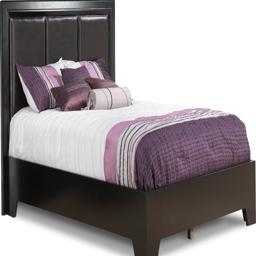

In [71]:
img_name = 'Train/bedroom/00004988.jpg'
pred = monk_eval.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name)

Prediction
    Image name:         Train/Exterior/00004988.jpg
    Predicted class:      Exterior
    Predicted score:      7.974052906036377



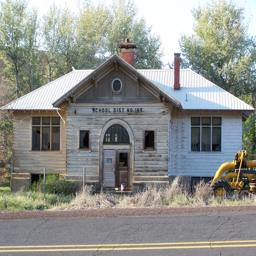

In [70]:
img_name = 'Train/Exterior/00004988.jpg'
pred = monk_eval.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name)

Prediction
    Image name:         Train/Interior/00004980.jpg
    Predicted class:      Interior
    Predicted score:      2.635537624359131



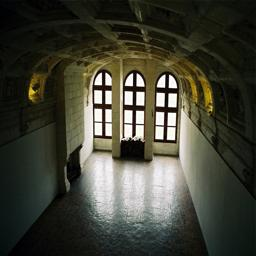

In [72]:
img_name = 'Train/Interior/00004980.jpg'
pred = monk_eval.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name)

Prediction
    Image name:         Train/living_room/00004988.jpg
    Predicted class:      living_room
    Predicted score:      2.5227513313293457



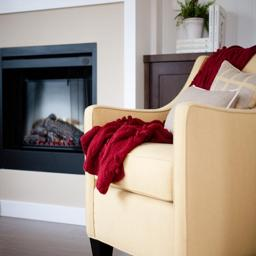

In [73]:
img_name = 'Train/living_room/00004988.jpg'
pred = monk_eval.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name)



---



<a id='6'></a>
#Comparing all the models.
Using comparison class of Monk library.

In [ ]:
# Invoke the comparison class
from compare_prototype import compare

In [74]:
gtf = compare(verbose=1);
gtf.Comparison("Comparison-1");

Comparison: - Comparison-1


###Adding experiment to the comparison object.

In [ ]:
gtf.Add_Experiment("Task", "gluon_resnet18_v1");
gtf.Add_Experiment("Task", "gluon-resnet18_v2");
gtf.Add_Experiment("Task", "gluon-resnet34_v1");

###Running analysis.

In [ ]:
gtf.Generate_Statistics();

### Training Accuracy Curves

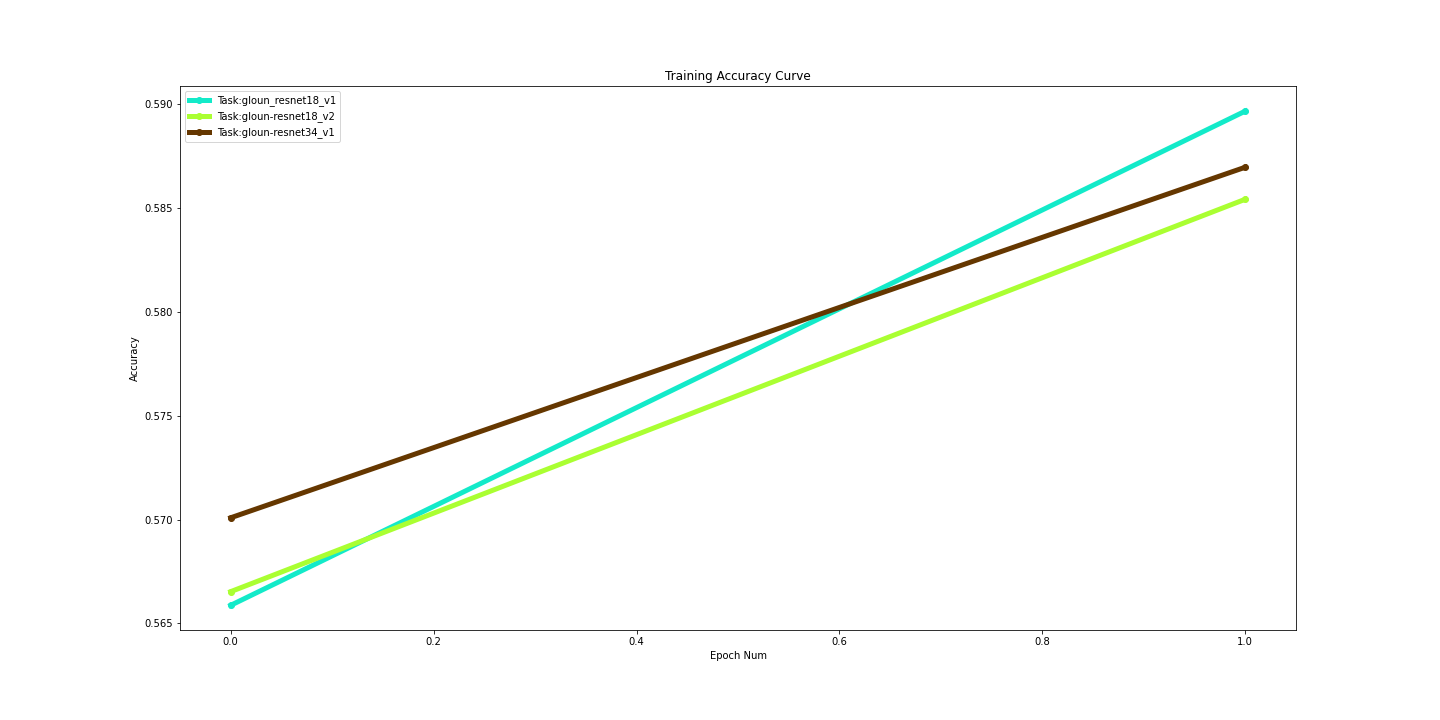

In [77]:
Image(filename="workspace/comparison/Comparison-1/train_accuracy.png")

In 2 epochs resnet18_v1 has the highest training accuracy.

### Training Loss Curves

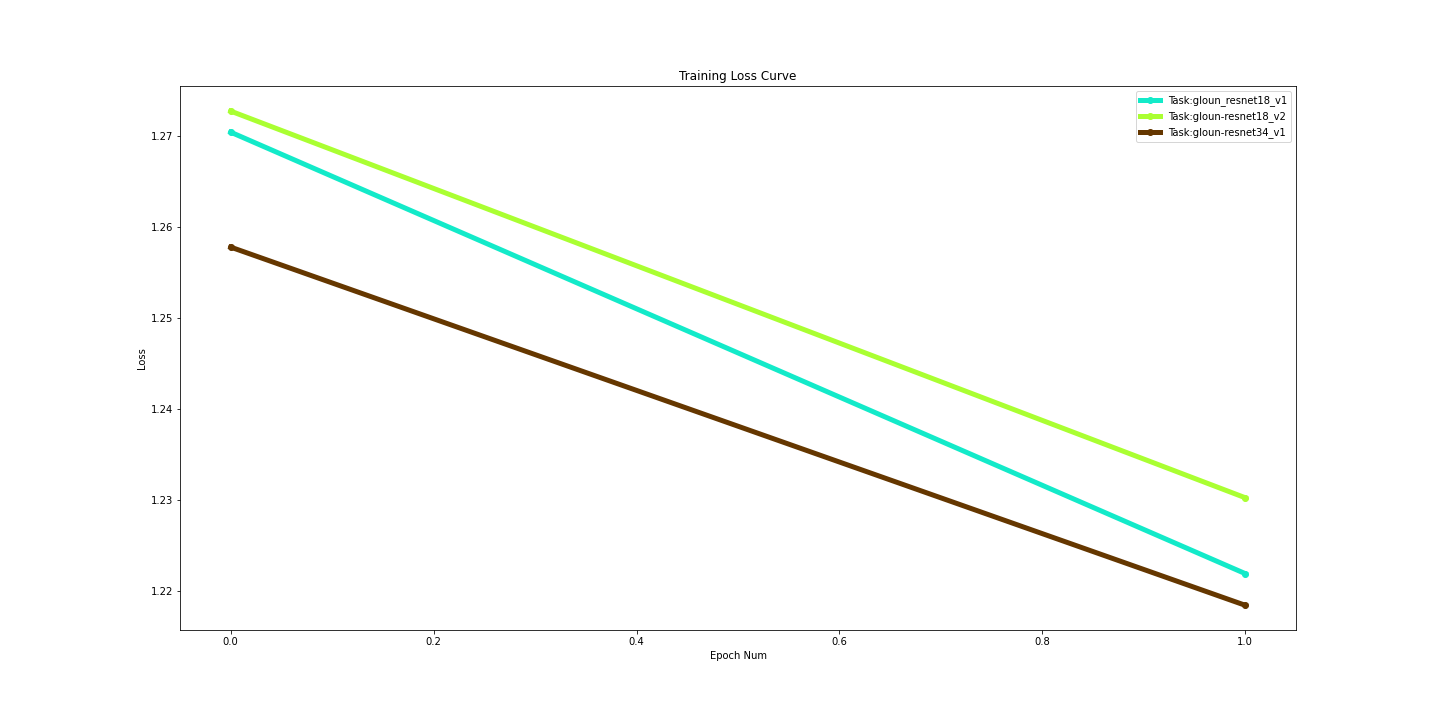

In [79]:
Image(filename="workspace/comparison/Comparison-1/train_loss.png")

In 2 epochs resnet34_v1 has the lowest training loss.

### Validation Accuracy Curves

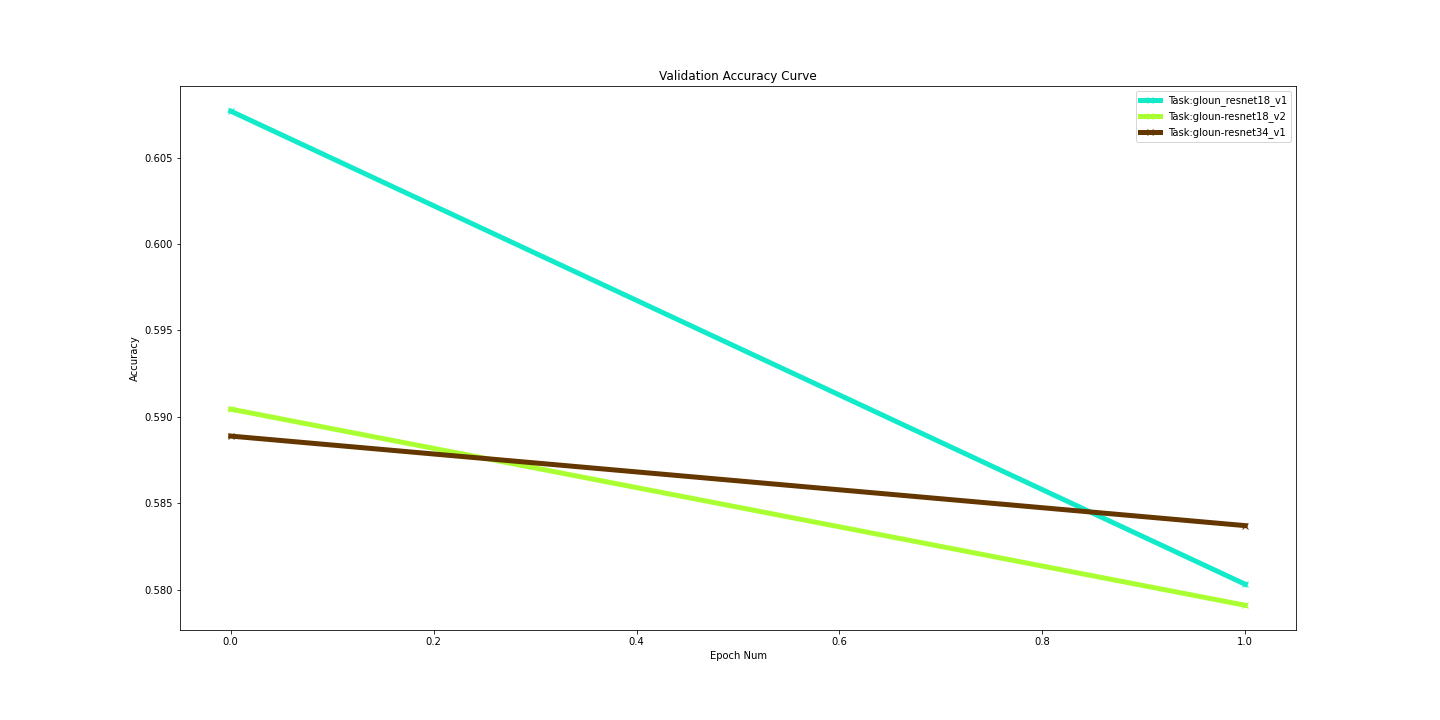

In [107]:
Image(filename="workspace/comparison/Comparison-1/val_accuracy.png")

In 2 epochs resnet34_v1 has the highest validation accuracy.

### Validation Loss Curves

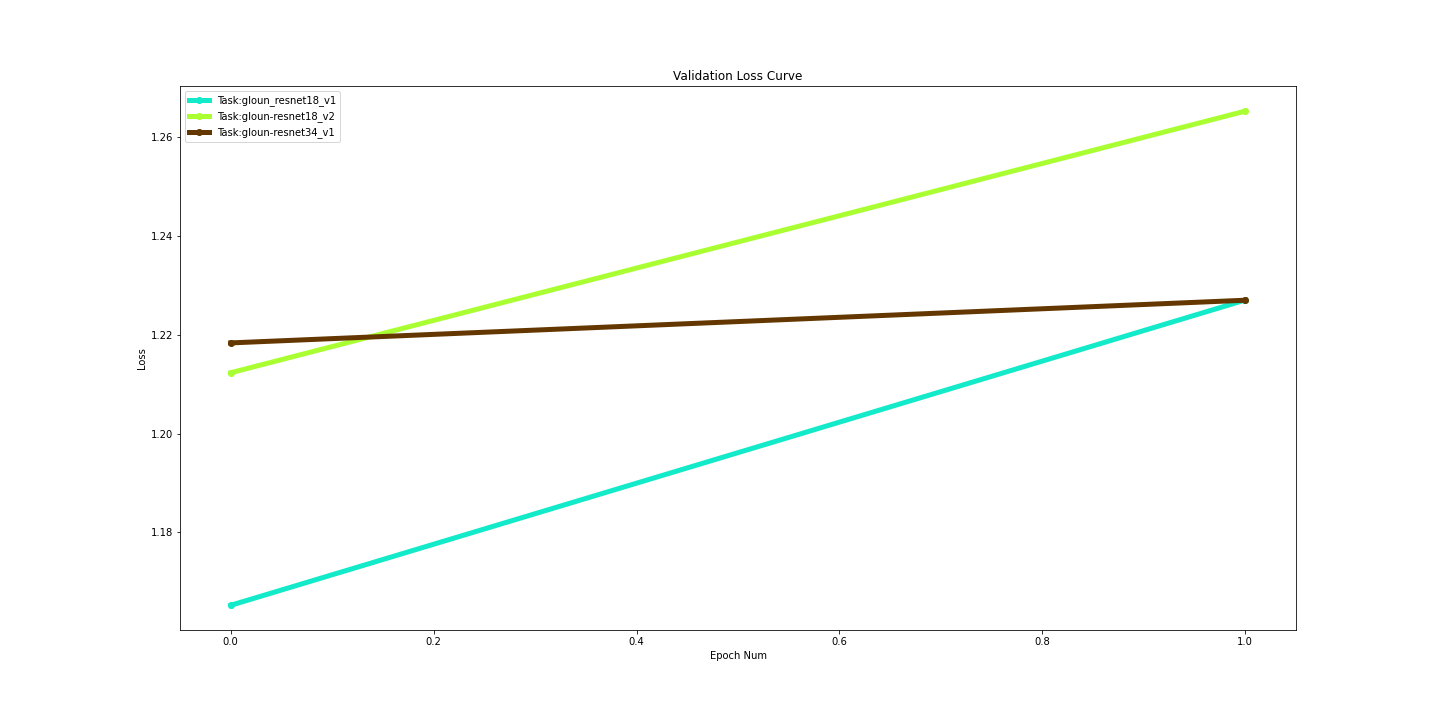

In [80]:
Image(filename="workspace/comparison/Comparison-1/val_loss.png")

In 2 epochs resnet18_v1 and resnet34_v1 have the lowest validation loss.

### Training time taken

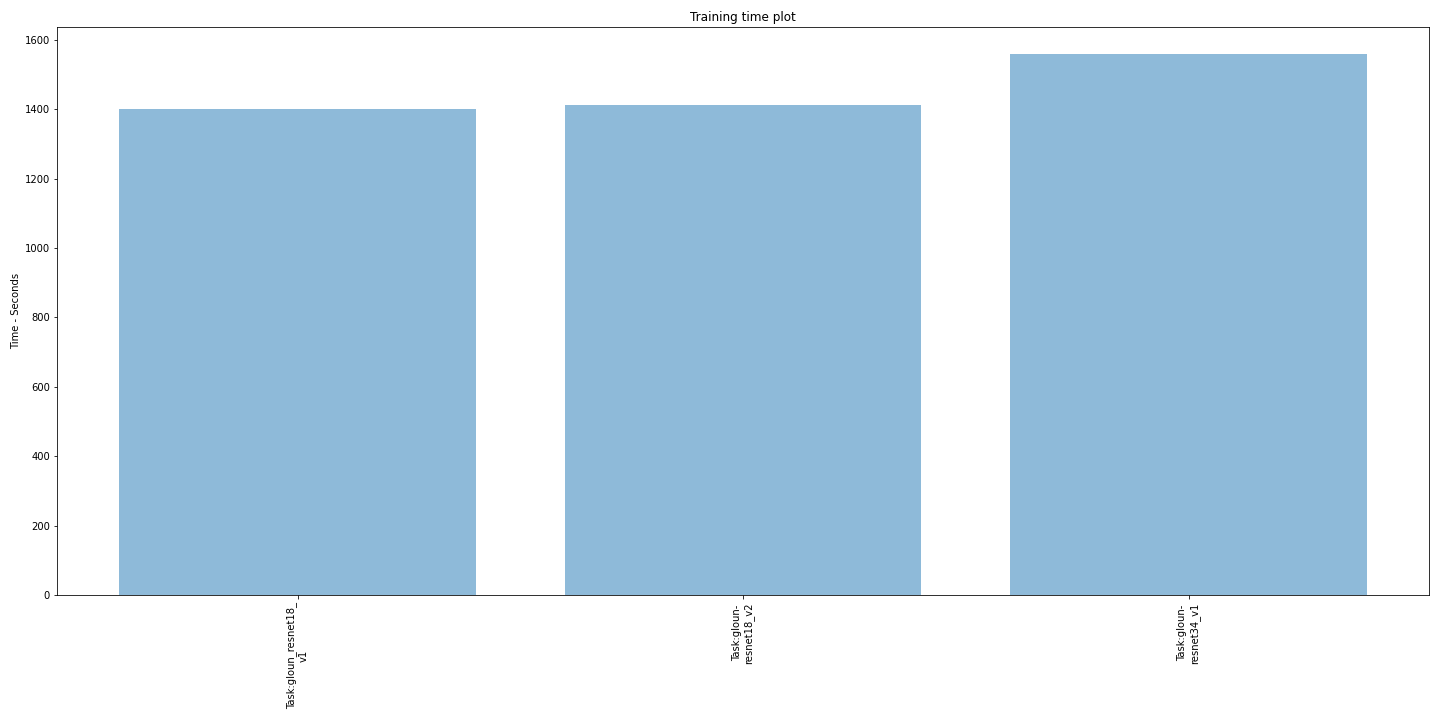

In [81]:
Image(filename="workspace/comparison/Comparison-1/stats_training_time.png")

As resnet18_v1 and resnet18_v2 have same number of layers so their training time is nearly same and resnet34_v1 has highest training time.

###Max GPU usage

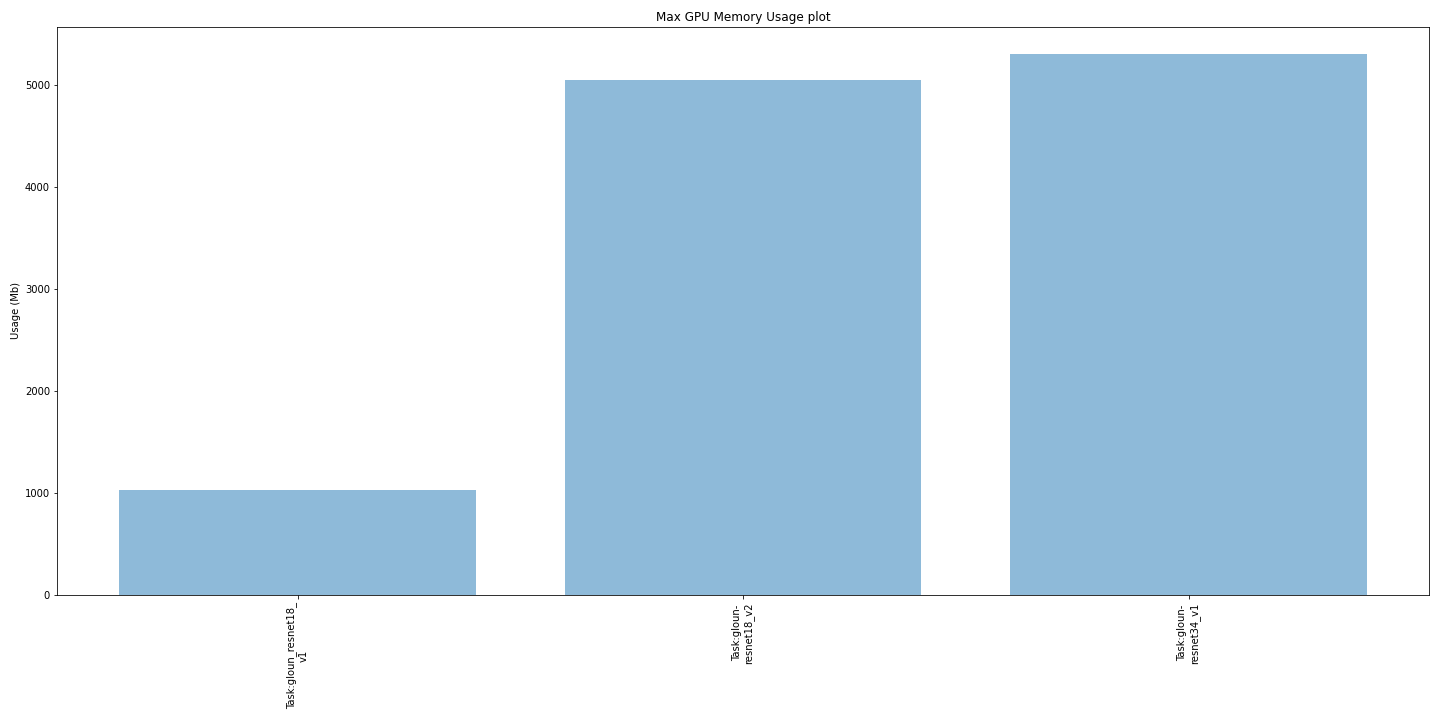

In [82]:
Image(filename="workspace/comparison/Comparison-1/stats_max_gpu_usage.png")

###Best validation accuracy.
It is average of validation accuracy of each epoch.

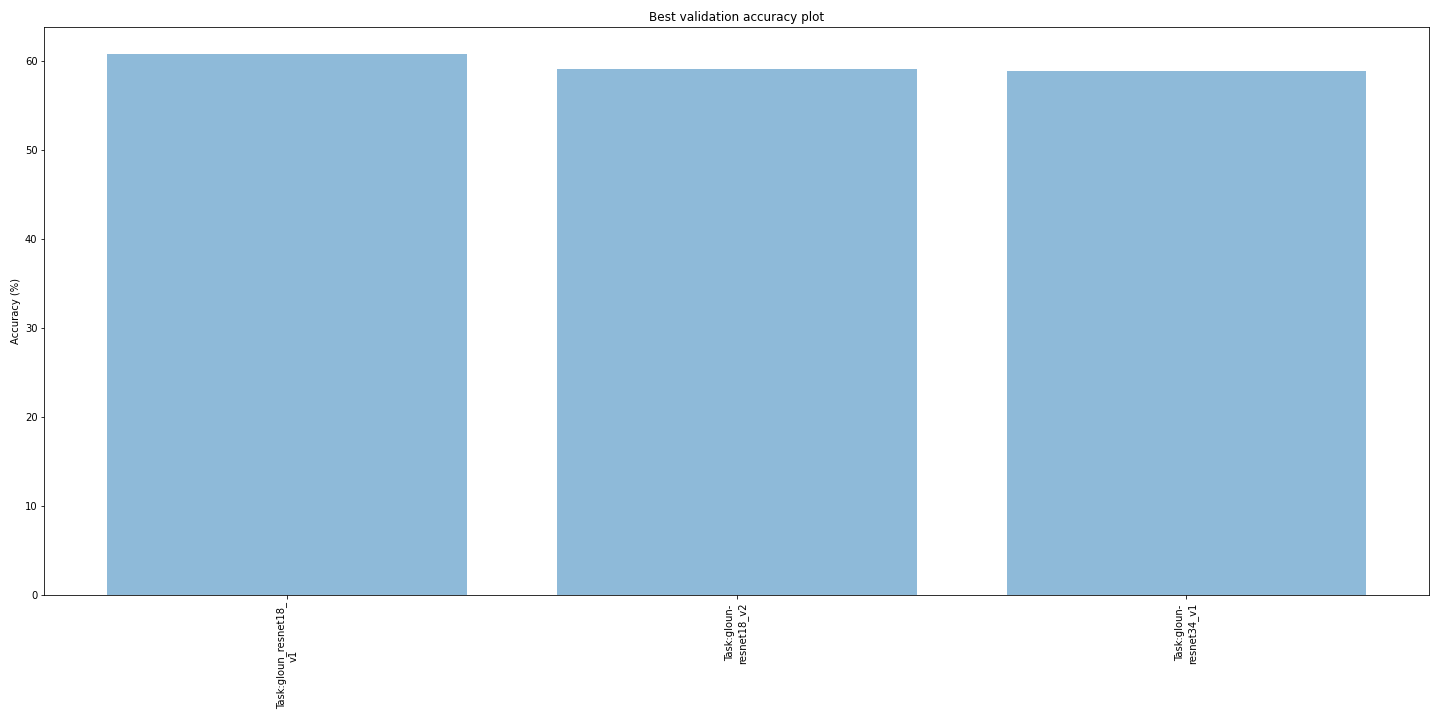

In [106]:
Image(filename="workspace/comparison/Comparison-1/stats_best_val_acc.png") 

##References:
- [monk_v1-->study_roadmaps-->2_transfer_learning_roadmap-->1_quick_prototyping_mode](https://github.com/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/2_transfer_learning_roadmap/1_quick_prototyping_mode)

- [monk_v1-->study_roadmaps-->1_getting_started_roadmap-->2_elemental_features_of_monk](https://github.com/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/1_getting_started_roadmap/2_elemental_features_of_monk)

- [monk_v1-->study_roadmaps-->4_image_classification_zoo](https://github.com/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/4_image_classification_zoo)

- [monk_v1-->study_roadmaps-->1_getting_started_roadmap-->7_extra_features](https://github.com/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/1_getting_started_roadmap/7_extra_features)